(768, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None

Slope :  0.018852486014366114

Intercept :  -0.25606083037934685

Residual of sum squares :  33.54189582110756
R2 :  0.05134032021109902


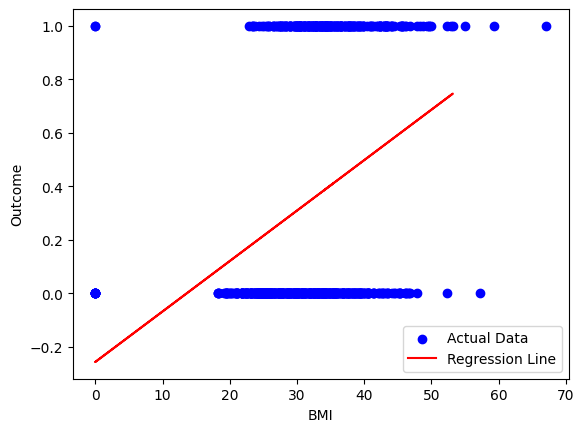

In [19]:
# ==============================
# Simple Linear Regression on diabetes.csv
# ==============================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

df = pd.read_csv("diabetes.csv")
print(df.shape)
print(df.info())
# print(df.head())

df.fillna(df.mode().loc[0], inplace=True)

le = LabelEncoder()
for col in df.columns:
    if df[col].dtype == "object":
        df[col] = le.fit_transform(df[col])

x = df[["BMI"]]
y = df["Outcome"]


x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("\nSlope : ", model.coef_[0])
print("\nIntercept : ", model.intercept_)

rss = np.sum((y_test- y_pred)**2)
print("\nResidual of sum squares : ",rss)

r2 = model.score(x_test, y_test)
print("R2 : ",r2)

plt.scatter(x,y, color="blue", label="Actual Data")
plt.plot(x_test, y_pred, color="red", label="Regression Line")
plt.xlabel("BMI");
plt.ylabel("Outcome")
plt.legend();
plt.show()